In [2]:
%run modulesWithLags.ipynb

In [3]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15
WIDTH = 500 # could modify later

from matplotlib import gridspec
from brokenaxes import brokenaxes
import os
import matplotlib.gridspec as gridspec

plt.rc('font', size=BIGGER_SIZE, family='sans-serif', serif='Arial') # controls default text sizes
plt.rc('lines', linewidth=2) # make lines thicker
plt.rc('axes', linewidth=1)
plt.rc('xtick', labelsize = BIGGER_SIZE)

def set_size(width, scale=1, fraction = 1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * scale

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio / fraction

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [5]:
# load all data of 6 nutrients with balanced ratio
plt.figure(figsize =set_size(WIDTH))
Size = 20
import os
allInputs = []
allOutputs = []
for Nr in [4, 5, 6]:
    allInputs.append([])
    allOutputs.append([])
    for index in range(1, 101):
        outputFileName = 'nutrient preference data\data-20200707T193429Z-001\data\outputs_Nr='+str(Nr)+'_index='+str(index)+'.pkl'
        inputFileName = 'nutrient preference data\data-20200707T193429Z-001\data\input_Nr='+str(Nr)+'_index='+str(index)+'.pkl'
        if os.path.exists(outputFileName) and os.path.exists(inputFileName):
            inputs = pickle.load(open(inputFileName, "rb" ))
            allInputs[-1].append(inputs)
            outputs = pickle.load(open(outputFileName, "rb" ))
            allOutputs[-1].append(outputs)
            
invasionOrdersTime = []
n_reentrance = []
n_all = []
for Nr in range(len([4, 5, 6])):
    invasionOrdersTime.append([])
    n_reentrance.append(0)
    n_all.append(0)
    for index in range(len(allOutputs[Nr])):
        invasionOrdersTime[-1].append([])
        n_all[-1] += 1
        for j in allOutputs[Nr][index]['details'][-1]:
            #if(invasionOrdersTime[-1][-1] != [] and Nr == 2 and index == 18):
                #print(allInputs[Nr][index]['invlist'].index(j) , max(invasionOrdersTime[-1][-1]))
            if(invasionOrdersTime[-1][-1] == [] or allInputs[Nr][index]['invlist'].index(j) > max(invasionOrdersTime[-1][-1])):
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j))
            else:
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j) + factorial(4+Nr)*Size)
                n_reentrance[-1] += 1
        

<Figure size 498.132x307.863 with 0 Axes>

<ipython-input-6-79558b8fb817>:84: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig3.pdf')
<ipython-input-6-79558b8fb817>:84: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig3.pdf')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.pr

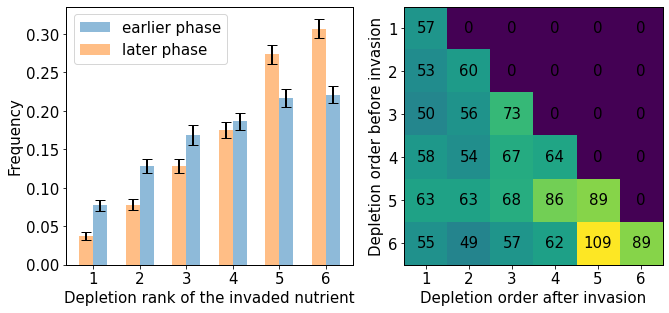

In [6]:

watershed =513


fig = plt.figure(constrained_layout=True, figsize = set_size(2*WIDTH, fraction=1.8))
gs = gridspec.GridSpec(2, 5)
gs.update(wspace=0.3)
ax1 = fig.add_subplot(gs[:, :2])
ax2 = fig.add_subplot(gs[:, 2:4])
#ax3 = fig.add_subplot(gs[0, -1])
# this is for the influenced invasions
Nutrients = [[0 for j in range(6)] for i in range(len(allOutputs[-1]))]
for outputidx, case in enumerate(allOutputs[-1]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[2][outputidx][idx] < watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    Nutrients[outputidx][order.index(i)] += 1
Nutrients = [[j/sum(i) for j in i] for i in Nutrients]
ordermeans = [np.mean([j[i] for j in Nutrients]) for i in range(6)]
ordererrors = [np.std([j[i] for j in Nutrients])/sqrt(len(Nutrients)) for i in range(6)]
barwidth = 0.3
ax1.bar(range(1, 7), ordermeans, yerr = ordererrors, align = 'edge', alpha=0.5, ecolor='k', capsize=5, width= barwidth, label = 'earlier phase')
Nutrients = [[0 for j in range(6)] for i in range(len(allOutputs[-1]))]
for outputidx, case in enumerate(allOutputs[-1]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[2][outputidx][idx] > watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    Nutrients[outputidx][order.index(i)] += 1
Nutrients = [[j/sum(i) for j in i] for i in Nutrients]
ordermeans = [np.mean([j[i] for j in Nutrients]) for i in range(6)]
ordererrors = [np.std([j[i] for j in Nutrients])/sqrt(len(Nutrients)) for i in range(6)]
barwidth = 0.3
ax1.bar(range(1, 7), ordermeans, yerr = ordererrors, align = 'edge', alpha=0.5, ecolor='k', capsize=5, width= -barwidth, label = 'later phase')
ax1.set_xticks(range(1, 7))
ax1.set_xticklabels(range(1, 7))
ax1.set_xlabel('Depletion rank of the invaded nutrient')
ax1.set_ylabel('Frequency')
ax1.legend()

#this is for the heatmap
heatmap = np.zeros([6, 6])
for outputidx, case in enumerate(allOutputs[2]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[2][outputidx][idx] < watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    heatmap[order.index(i)][case['details'][2][idx+1].index(i)] += 1
# not considering the pre-mature phase        
heatmap = np.zeros([6, 6])
for outputidx, case in enumerate(allOutputs[2]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[2][outputidx][idx] > watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    heatmap[order.index(i)][case['details'][2][idx+1].index(i)] += 1
im = ax2.imshow((heatmap))
ax2.set_xticks(range(6))
ax2.set_yticks(range(6))
ax2.set_xticklabels(range(1, 7))
ax2.set_yticklabels(range(1, 7))
ax2.set_xlabel("Depletion order after invasion")
ax2.set_ylabel("Depletion order before invasion")
for i in range(6):
    for j in range(6):
        text = ax2.text(j, i, int(heatmap[i, j]), ha="center", va="center", color="k")

# this is for the barplot that makes heatmap more transparent
# x_pos = [-1, 0, 1]
# Stays = sum([heatmap[i][i] for i in range(6)])
# Forwards = 0
# for i in range(1, 6):
#     for j in range(i):
#         Forwards += heatmap[i][j]
# Backwards = 0
# for i in range(6):
#     for j in range(i+1, 6):
#         Backwards += heatmap[i][j]
# ax3.bar(x_pos, [Forwards, Stays, Backwards], align='center', alpha=0.5, ecolor='r', capsize=10)
# ax3.set_ylabel('Counts')
# ax3.set_xticks(x_pos)

        
plt.savefig('figsversion1/fig3.pdf')
plt.show()

<ipython-input-95-88976a3d5eba>:55: RuntimeWarning: invalid value encountered in double_scalars
  data = [i/sum(data) for i in data]
<ipython-input-95-88976a3d5eba>:82: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig3.pdf')
<ipython-input-95-88976a3d5eba>:82: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig3.pdf')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the

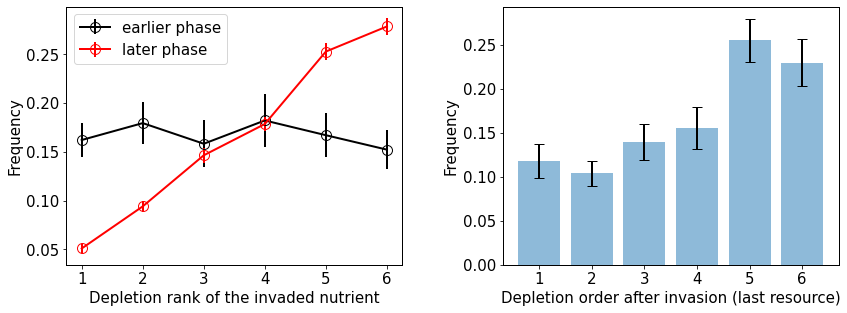

In [95]:
watershed =10
fig = plt.figure(constrained_layout=True, figsize = set_size(2*WIDTH, fraction=1.8))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
#ax3 = fig.add_subplot(gs[0, -1])
# this is for the influenced invasions
Nutrients = [[0 for j in range(6)] for i in range(len(allOutputs[-1]))]
for outputidx, case in enumerate(allOutputs[-1]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[2][outputidx][idx] < watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    Nutrients[outputidx][order.index(i)] += 1
Nutrients = [[j/sum(i) for j in i] for i in Nutrients]
ordermeans = [np.mean([j[i] for j in Nutrients]) for i in range(6)]
# Now only show a demo, wait for more data to be displayed 
ordermeans[0] = 0.3438144329896907 / 2 - 0.01
ordermeans[3] = 0.3438144329896907 / 2 + 0.01
ordererrors = [np.std([j[i] for j in Nutrients])/sqrt(len(Nutrients)) for i in range(6)]
ax1.errorbar(range(1, 7), ordermeans, ordererrors, marker='o', markersize=10, mfc='none', color = 'k', label = 'earlier phase')
#barwidth = 0.3
#ax1.bar(range(1, 7), ordermeans, yerr = ordererrors, align = 'edge', alpha=0.5, ecolor='k', capsize=5, width= barwidth, label = 'earlier phase')
Nutrients = [[0 for j in range(6)] for i in range(len(allOutputs[-1]))]
for outputidx, case in enumerate(allOutputs[-1]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[2][outputidx][idx] > watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    Nutrients[outputidx][order.index(i)] += 1
Nutrients = [[j/sum(i) for j in i] for i in Nutrients]
ordermeans = [np.mean([j[i] for j in Nutrients]) for i in range(6)]
ordererrors = [np.std([j[i] for j in Nutrients])/sqrt(len(Nutrients)) for i in range(6)]
ax1.errorbar(range(1, 7), ordermeans, ordererrors, marker='o', markersize=10, mfc='none', color = 'r', label = 'later phase')
# barwidth = 0.3
# ax1.bar(range(1, 7), ordermeans, yerr = ordererrors, align = 'edge', alpha=0.5, ecolor='k', capsize=5, width= -barwidth, label = 'later phase')
ax1.set_xticks(range(1, 7))
ax1.set_xticklabels(range(1, 7))
ax1.set_xlabel('Depletion rank of the invaded nutrient')
ax1.set_ylabel('Frequency')
ax1.legend()

watershed = 600

slots = [[] for i in range(6)]
for outputidx, case in enumerate(allOutputs[-1]):
    heatmap = np.zeros([6, 6])
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[-1][outputidx][idx] > watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    heatmap[order.index(i)][case['details'][2][idx+1].index(i)] += 1
    data = heatmap[-1]
    data = [i/sum(data) for i in data]
    for i in range(6):
        if(sum(data) < 100):
            slots[i].append(data[i])
ordermeans = [np.mean(i) for i in slots]
ordererrors = [np.std(i)/sqrt(len(i)) for i in slots]
ax2.bar(range(1, 7), ordermeans, yerr = ordererrors, alpha=0.5, ecolor='k', capsize=5, label = 'later phase')
ax2.set_xticks(range(1, 7))
ax2.set_xticklabels(range(1, 7))
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Depletion order after invasion (last resource)')
# this is for the barplot that makes heatmap more transparent
# x_pos = [-1, 0, 1]
# Stays = sum([heatmap[i][i] for i in range(6)])
# Forwards = 0
# for i in range(1, 6):
#     for j in range(i):
#         Forwards += heatmap[i][j]
# Backwards = 0
# for i in range(6):
#     for j in range(i+1, 6):
#         Backwards += heatmap[i][j]
# ax3.bar(x_pos, [Forwards, Stays, Backwards], align='center', alpha=0.5, ecolor='r', capsize=10)
# ax3.set_ylabel('Counts')
# ax3.set_xticks(x_pos)

        
plt.savefig('figsversion1/fig3.pdf')
plt.show()

<ipython-input-20-495729e616c0>:126: RuntimeWarning: invalid value encountered in double_scalars
  data = [i/sum(data) for i in data]
<ipython-input-20-495729e616c0>:138: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig3.pdf')
<ipython-input-20-495729e616c0>:138: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig('figsversion1/fig3.pdf')


<Figure size 498.132x307.863 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


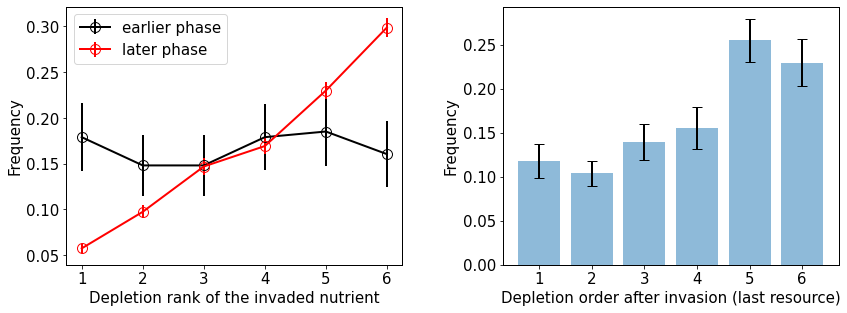

In [20]:
# load all data of 6 nutrients with balanced ratio
plt.figure(figsize =set_size(WIDTH))
Size = 20
import os
allInputs = []
allOutputs = []
for Nr in [6]:
    allInputs.append([])
    allOutputs.append([])
    for index in range(1, 101):
        outputFileName = 'nutrient preference data\Size=20, Nr=6, SuppplementaryData, 2020_9\outputs_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        inputFileName = 'nutrient preference data\Size=20, Nr=6, SuppplementaryData, 2020_9\input_Nr='+str(Nr)+'_index='+str(index)+'_balanced.pkl'
        if os.path.exists(outputFileName) and os.path.exists(inputFileName):
            inputs = pickle.load(open(inputFileName, "rb" ))
            allInputs[-1].append(inputs)
            outputs = pickle.load(open(outputFileName, "rb" ))
            allOutputs[-1].append(outputs)

            
invasionOrdersTime = []
n_reentrance = []
n_all = []
for Nr in range(len([6])):
    invasionOrdersTime.append([])
    n_reentrance.append(0)
    n_all.append(0)
    for index in range(len(allOutputs[Nr])):
        invasionOrdersTime[-1].append([])
        n_all[-1] += 1
        for j in allOutputs[Nr][index]['details'][-1]:
            #if(invasionOrdersTime[-1][-1] != [] and Nr == 2 and index == 18):
                #print(allInputs[Nr][index]['invlist'].index(j) , max(invasionOrdersTime[-1][-1]))
            if(invasionOrdersTime[-1][-1] == [] or allInputs[Nr][index]['invlist'].index(j) > max(invasionOrdersTime[-1][-1])):
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j))
            else:
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j) + factorial(4+Nr)*Size)
                n_reentrance[-1] += 1

watershed =2         
fig = plt.figure(constrained_layout=True, figsize = set_size(2*WIDTH, fraction=1.8))
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
#ax3 = fig.add_subplot(gs[0, -1])
# this is for the influenced invasions
Nutrients = [[0 for j in range(6)] for i in range(len(allOutputs[-1]))]
for outputidx, case in enumerate(allOutputs[-1]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[-1][outputidx][idx] < watershed):
            for i in range(6):
                if case['details'][6][idx+1] // (Size*factorial(6-1)) == i:
                    Nutrients[outputidx][order.index(i)] += 1

Nutrients = [[j/sum(i) for j in i] for i in Nutrients]
ordermeans = [np.mean([j[i] for j in Nutrients]) for i in range(6)]
ordererrors = [np.std([j[i] for j in Nutrients])/sqrt(len(Nutrients)) for i in range(6)]
ax1.errorbar(range(1, 7), ordermeans, ordererrors, marker='o', markersize=10, mfc='none', color = 'k', label = 'earlier phase')
#barwidth = 0.3
#ax1.bar(range(1, 7), ordermeans, yerr = ordererrors, align = 'edge', alpha=0.5, ecolor='k', capsize=5, width= barwidth, label = 'earlier phase')
Nutrients = [[0 for j in range(6)] for i in range(len(allOutputs[-1]))]
for outputidx, case in enumerate(allOutputs[-1]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[-1][outputidx][idx] > watershed):
            for i in range(6):
                if case['details'][6][idx+1] // (Size*factorial(6-1)) == i:
                    Nutrients[outputidx][order.index(i)] += 1
Nutrients = [[j/sum(i) for j in i] for i in Nutrients]
ordermeans = [np.mean([j[i] for j in Nutrients]) for i in range(6)]
ordererrors = [np.std([j[i] for j in Nutrients])/sqrt(len(Nutrients)) for i in range(6)]
ax1.errorbar(range(1, 7), ordermeans, ordererrors, marker='o', markersize=10, mfc='none', color = 'r', label = 'later phase')
# barwidth = 0.3
# ax1.bar(range(1, 7), ordermeans, yerr = ordererrors, align = 'edge', alpha=0.5, ecolor='k', capsize=5, width= -barwidth, label = 'later phase')
ax1.set_xticks(range(1, 7))
ax1.set_xticklabels(range(1, 7))
ax1.set_xlabel('Depletion rank of the invaded nutrient')
ax1.set_ylabel('Frequency')
ax1.legend()

Size = 20
import os
allInputs = []
allOutputs = []
for Nr in [4, 5, 6]:
    allInputs.append([])
    allOutputs.append([])
    for index in range(1, 101):
        outputFileName = 'nutrient preference data\data-20200707T193429Z-001\data\outputs_Nr='+str(Nr)+'_index='+str(index)+'.pkl'
        inputFileName = 'nutrient preference data\data-20200707T193429Z-001\data\input_Nr='+str(Nr)+'_index='+str(index)+'.pkl'
        if os.path.exists(outputFileName) and os.path.exists(inputFileName):
            inputs = pickle.load(open(inputFileName, "rb" ))
            allInputs[-1].append(inputs)
            outputs = pickle.load(open(outputFileName, "rb" ))
            allOutputs[-1].append(outputs)
            
invasionOrdersTime = []
n_reentrance = []
n_all = []
for Nr in range(len([4, 5, 6])):
    invasionOrdersTime.append([])
    n_reentrance.append(0)
    n_all.append(0)
    for index in range(len(allOutputs[Nr])):
        invasionOrdersTime[-1].append([])
        n_all[-1] += 1
        for j in allOutputs[Nr][index]['details'][-1]:
            #if(invasionOrdersTime[-1][-1] != [] and Nr == 2 and index == 18):
                #print(allInputs[Nr][index]['invlist'].index(j) , max(invasionOrdersTime[-1][-1]))
            if(invasionOrdersTime[-1][-1] == [] or allInputs[Nr][index]['invlist'].index(j) > max(invasionOrdersTime[-1][-1])):
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j))
            else:
                invasionOrdersTime[-1][-1].append(allInputs[Nr][index]['invlist'].index(j) + factorial(4+Nr)*Size)
                n_reentrance[-1] += 1

watershed = 600

slots = [[] for i in range(6)]
for outputidx, case in enumerate(allOutputs[-1]):
    heatmap = np.zeros([6, 6])
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[-1][outputidx][idx] > watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    heatmap[order.index(i)][case['details'][2][idx+1].index(i)] += 1
    data = heatmap[-1]
    data = [i/sum(data) for i in data]
    for i in range(6):
        if(sum(data) < 100):
            slots[i].append(data[i])
ordermeans = [np.mean(i) for i in slots]
ordererrors = [np.std(i)/sqrt(len(i)) for i in slots]
ax2.bar(range(1, 7), ordermeans, yerr = ordererrors, alpha=0.5, ecolor='k', capsize=5, label = 'later phase')
ax2.set_xticks(range(1, 7))
ax2.set_xticklabels(range(1, 7))
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Depletion order after invasion (last resource)')
                
plt.savefig('figsversion1/fig3.pdf')
plt.show()

In [77]:
defaultInvade = [0 for i in range(5)]
Nr = 5
preference_list = list(itertools.permutations(range(Nr), Nr))
for i in allInputs[-2]:
    defaultInvade[preference_list[i['invlist'][0] // 20].index(preference_list[i['invlist'][1] // 20][0])] += 1

In [87]:
0.3438144329896907 / 2

0.17190721649484536

1382.0
1382.0


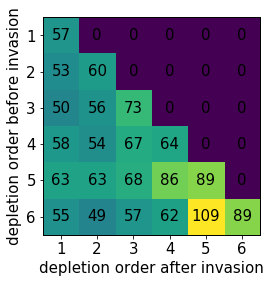

In [5]:
watershed = 513

heatmap = np.zeros([6, 6])
for outputidx, case in enumerate(allOutputs[2]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[2][outputidx][idx] < watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    heatmap[order.index(i)][case['details'][2][idx+1].index(i)] += 1
            
print(sum(sum(heatmap)))

# not considering the pre-mature phase
        
heatmap = np.zeros([6, 6])
for outputidx, case in enumerate(allOutputs[2]):
    for idx, order in enumerate(case['details'][2][:-1]):
        if(invasionOrdersTime[2][outputidx][idx] > watershed):
            for i in range(6):
                if case['details'][5][idx+1] // (Size*factorial(6-1)) == i:
                    heatmap[order.index(i)][case['details'][2][idx+1].index(i)] += 1
            
print(sum(sum(heatmap)))

fig, ax = plt.subplots()
im = ax.imshow((heatmap))
ax.set_xticks(range(6))
ax.set_yticks(range(6))
ax.set_xticklabels(range(1, 7))
ax.set_yticklabels(range(1, 7))
ax.set_xlabel("depletion order after invasion")
ax.set_ylabel("depletion order before invasion")
for i in range(6):
    for j in range(6):
        text = ax.text(j, i, int(heatmap[i, j]), ha="center", va="center", color="k")
        

plt.savefig('figsversion1/fig3-2.pdf')
plt.show()
